In [179]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
def strToInt(x):
    if ',' in x or '$' in x:
        x = x.replace(',', '').replace('$', '')
        return int(x)
    else:
        x = int(x)
        return x

def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x
    

    



In [181]:
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets
tn_movie_budgets.info()
tn_movie_budgets.sort_values('worldwide_gross', ascending=False)[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [11]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


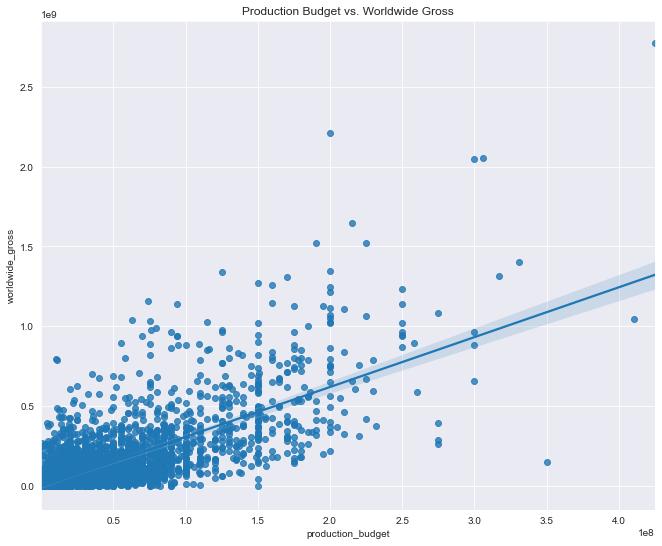

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['production_budget']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel("Worldwide Gross")
sns.regplot(x=x, y=y)
plt.show();

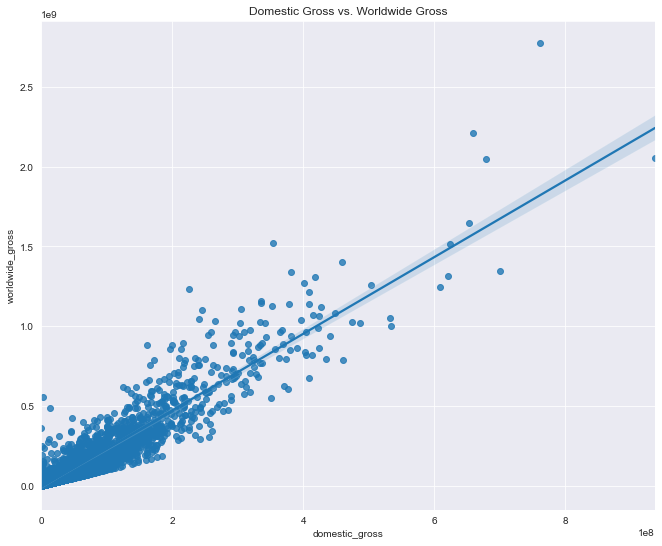

In [13]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['domestic_gross']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Domestic Gross vs. Worldwide Gross')
ax.set_xlabel('Domestic Gross')
ax.set_ylabel("Worldwide Gross")
sns.regplot(x=x, y=y)
plt.show();

In [14]:
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
bom_movie_gross['foreign_gross'].map(lambda x: type(x))
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

In [15]:
bom_movie_gross.sort_values('domestic_gross', ascending = False)[:10]
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   3359 non-null   float64
 3   foreign_gross    2037 non-null   float64
 4   year             3387 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


<ipython-input-16-303d0c8a4dd3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, size=15, rotation=15)
<ipython-input-16-303d0c8a4dd3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)


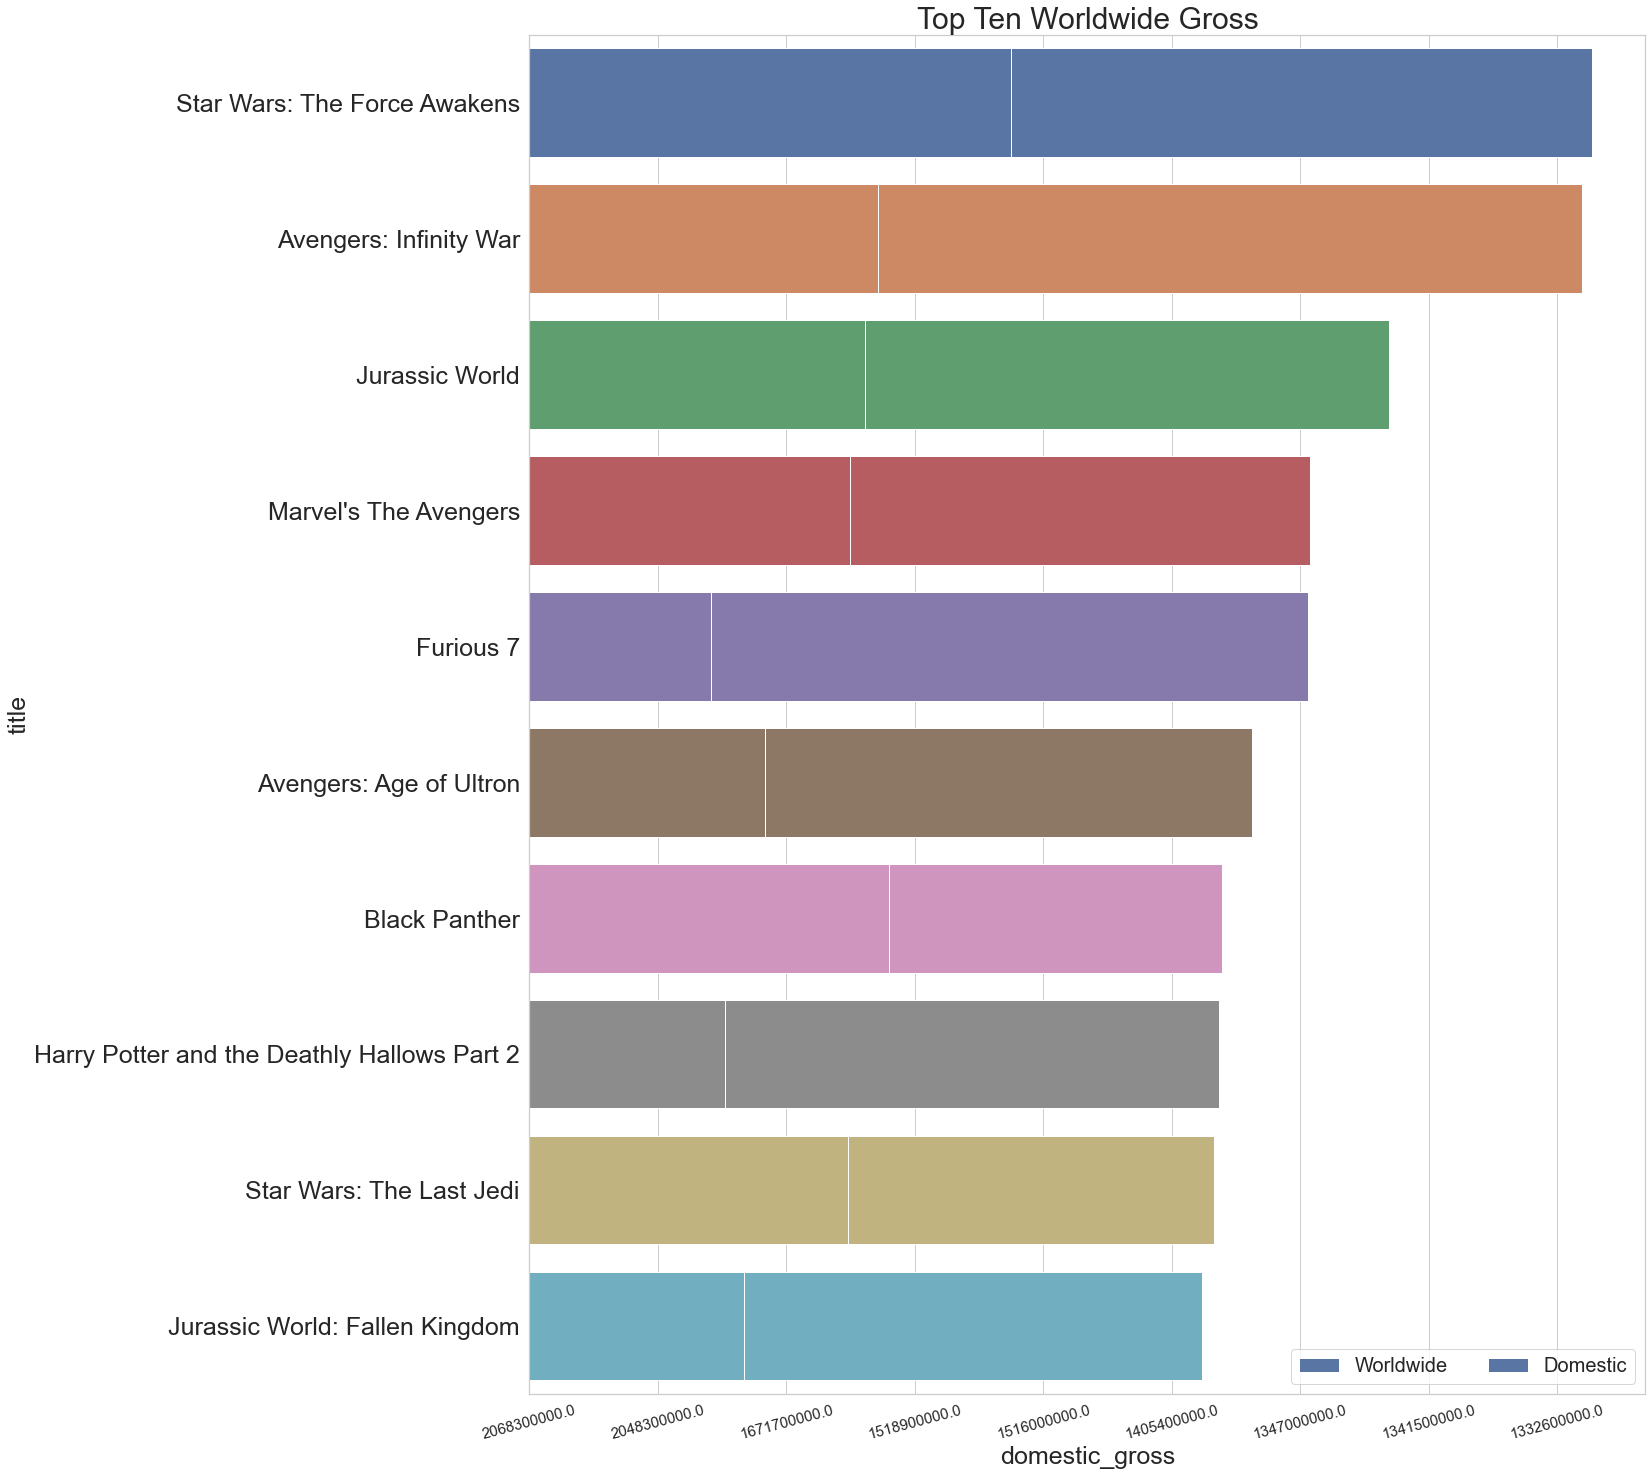

In [16]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 25))

x = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['worldwide_gross']
y = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['title']
z = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['domestic_gross']

ax.set_title('Top Ten Worldwide Gross', size=30)
ax.set_xlabel('Titles', size=25)
ax.set_xticklabels(x, size=15, rotation=15)
ax.set_yticklabels(y, size=25)
ax.set_ylabel("Worldwide Gross", size=25)
sns.set_color_codes('deep')
sns.barplot(x=x, y=y, orient='h', label='Worldwide')
sns.set_color_codes("pastel")
sns.barplot(x=z, y=y, orient='h', label='Domestic')
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=20);

# CLEAN FRANKENSTEIN BELOW

In [17]:
#Pulling CSVs
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')

In [18]:
# Creating Frankenstein
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)
imdb_title_crew.set_index('tconst', inplace=True)
imdb_title_principals.set_index('tconst', inplace=True)
imdb_frankenstein = imdb_title_basics.join(imdb_title_ratings, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_crew, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_principals, how='left')
imdb_frankenstein.reset_index(inplace=True)
imdb_frankenstein.set_index('nconst', inplace=True)
imdb_name_basics.set_index('nconst', inplace=True)
imdb_frankenstein = imdb_frankenstein.join(imdb_name_basics, how='left')
imdb_frankenstein.reset_index(inplace=True)

In [174]:
#Filtering to only include directors
imdb_frankenstein_bride = imdb_frankenstein[imdb_frankenstein['category'] == 'director']
# Creating new column to help determine more popular directors
imdb_frankenstein_bride['known_title_num'] = pd.Series(data=int)
imdb_frankenstein_bride['known_title_num'] = imdb_frankenstein_bride['known_for_titles'].str.len()

<ipython-input-174-b89ea79ca710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_frankenstein_bride['known_title_num'] = pd.Series(data=int)
<ipython-input-174-b89ea79ca710>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_frankenstein_bride['known_title_num'] = imdb_frankenstein_bride['known_for_titles'].str.len()


In [175]:
# SORTING BY NUM OF KNOWN TITLES THEN DROPPING DUPLICATES IN ORIGINAL_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.sort_values('known_title_num', ascending=False).drop_duplicates(subset=['original_title'])
#DROPPING DUPLICATES IN PRIMARY_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['primary_title'])
# DROPPING DEAD DIRECTORS
imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['death_year'].isna()]
imdb_frankenstein_bride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119410 entries, 621658 to 1028157
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              119410 non-null  object 
 1   tconst              119410 non-null  object 
 2   primary_title       119410 non-null  object 
 3   original_title      119410 non-null  object 
 4   start_year          119410 non-null  int64  
 5   runtime_minutes     95276 non-null   float64
 6   genres              116693 non-null  object 
 7   averagerating       62466 non-null   float64
 8   numvotes            62466 non-null   float64
 9   directors           119382 non-null  object 
 10  writers             91385 non-null   object 
 11  ordering            119410 non-null  float64
 12  category            119410 non-null  object 
 13  job                 3618 non-null    object 
 14  characters          0 non-null       object 
 15  primary_name        119410 n

In [176]:
imdb_frankenstein_bride.columns

Index(['nconst', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'ordering', 'category', 'job', 'characters', 'primary_name',
       'birth_year', 'death_year', 'primary_profession', 'known_for_titles',
       'known_title_num'],
      dtype='object')

In [177]:
# Dropping unnecessary columns
imdb_frankenstein_bride.drop(labels=['nconst', 'tconst', 'directors', 'writers', 'ordering', 'category', 'job', 'characters', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles', 'known_title_num'], axis=1, inplace=True)

In [178]:
imdb_frankenstein_bride

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name
621658,Khaos,Khaos,2012,95.0,Documentary,7.8,6.0,Ana Dumitrescu
621659,Même pas peur!,Même pas peur!,2015,100.0,Documentary,NaN,NaN,Ana Dumitrescu
621660,Licu: A Romanian Story,Licu: A Romanian Story,2017,86.0,"Documentary,Drama",7.8,35.0,Ana Dumitrescu
784055,Night Out,Night Out,2019,116.0,"Comedy,Thriller",8.1,10.0,Rakesh Adiga
459190,It's Major,It's Major,2019,NaN,Comedy,NaN,NaN,Sanedria Potter-Holt
...,...,...,...,...,...,...,...,...
1028070,The Ukrainian Insurgent Army Alive: Orest,The Ukrainian Insurgent Army Alive: Orest,2017,36.0,"Biography,Documentary,Drama",NaN,NaN,Maria Yaremchuk
1028094,Freshman Year,Freshman Year,2019,NaN,Drama,NaN,NaN,Jude Okwudiafor Johnson
1028150,Jai Jagadeka Veera,Jai Jagadeka Veera,2015,99.0,Drama,NaN,NaN,P.S. Ramu
1028155,White Spot,White Spot,2018,92.0,"Adventure,Documentary,Drama",NaN,NaN,Tin Brendel


In [131]:
# sns.pairplot(imdb_frankenstein_son, kind="scatter", hue="genres", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
# plt.show()